In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['axes.labelsize']= 13.
plt.rcParams['xtick.labelsize']= 13.
plt.rcParams['ytick.labelsize']= 13.
plt.rcParams['legend.fontsize'] = 13.
plt.rcParams['figure.figsize']= [15.,8.]

In [3]:
train = pd.read_excel(r"data/Data_Train.xlsx")

In [4]:
train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [5]:
train.shape

(10683, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


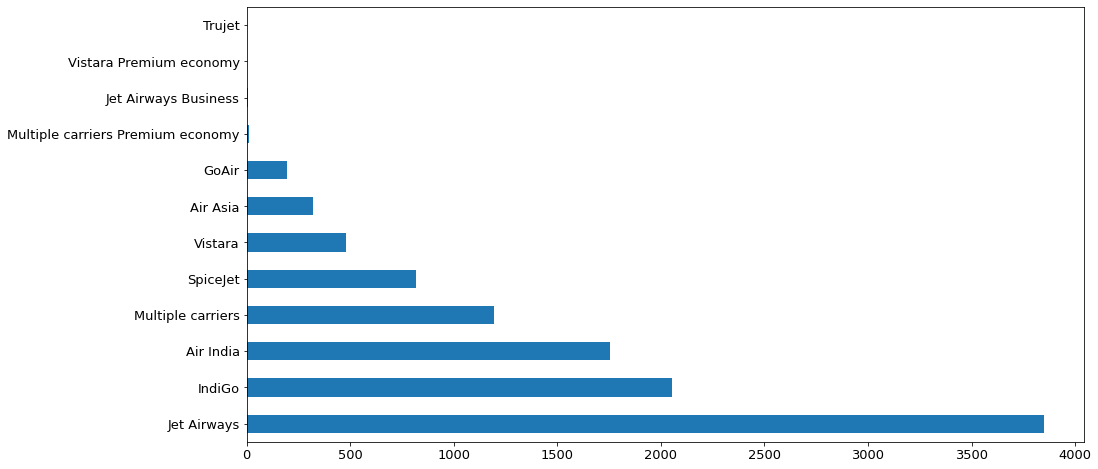

In [7]:
train["Airline"].value_counts().plot(kind="barh");

In [8]:
train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
4h 10m       1
41h 20m      1
36h 25m      1
35h 35m      1
29h 10m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### 1 missing value found in Route and Total_Stops columns

In [10]:
# Drop missing value column
train.dropna(inplace=True)  

In [11]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
### Day, month and year will be extracted froo the Date_of_Journeyt
train["Journey_date"] = pd.to_datetime(train["Date_of_Journey"],format="%d/%m/%Y").dt.day
train["Journey_month"] = pd.to_datetime(train["Date_of_Journey"],format="%d/%m/%Y").dt.month
train["Journey_year"] = pd.to_datetime(train["Date_of_Journey"],format="%d/%m/%Y").dt.year

In [13]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [14]:
train["Journey_year"].value_counts()

2019    10682
Name: Journey_year, dtype: int64

In [15]:
train.drop(["Date_of_Journey"], axis=1, inplace=True)

In [16]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [17]:
# extracting Departure Hours and minutes
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
train["Dep_minutes"] = pd.to_datetime(train["Dep_Time"]).dt.minute
train.drop(["Dep_Time"],axis=1,inplace=True)

In [18]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [19]:
# Extracting arrival hours and minutes
train["Arrival_hour"] = pd.to_datetime(train["Arrival_Time"]).dt.hour
train["Arrival_minute"] = pd.to_datetime(train["Arrival_Time"]).dt.minute
train.drop(["Arrival_Time"],axis=1,inplace=True)

In [20]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [21]:
# extraction duration hours and minutes from duration column

duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2: # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]  # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [22]:
train["duration_hours"] = duration_hours
train["duration_mins"]  = duration_mins

In [23]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [24]:
train.drop(["Duration"],axis=1,inplace=True) 

In [25]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [26]:
train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [27]:
# Most coloums of the additional info of having " no info " which is of no use 
# Route and No of Stops shows  and shares same info about the stops 
train.drop(["Additional_Info", "Route"], axis=1, inplace=True)

In [28]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Journey_year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  object
 4   Price           10682 non-null  int64 
 5   Journey_date    10682 non-null  int64 
 6   Journey_month   10682 non-null  int64 
 7   Journey_year    10682 non-null  int64 
 8   Dep_hour        10682 non-null  int64 
 9   Dep_minutes     10682 non-null  int64 
 10  Arrival_hour    10682 non-null  int64 
 11  Arrival_minute  10682 non-null  int64 
 12  duration_hours  10682 non-null  int64 
 13  duration_mins   10682 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 1.2+ MB


## Handling Categorical features
One can find many ways to handle categorical data. Some of them categorical data are,

    **Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
    **Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [30]:
train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

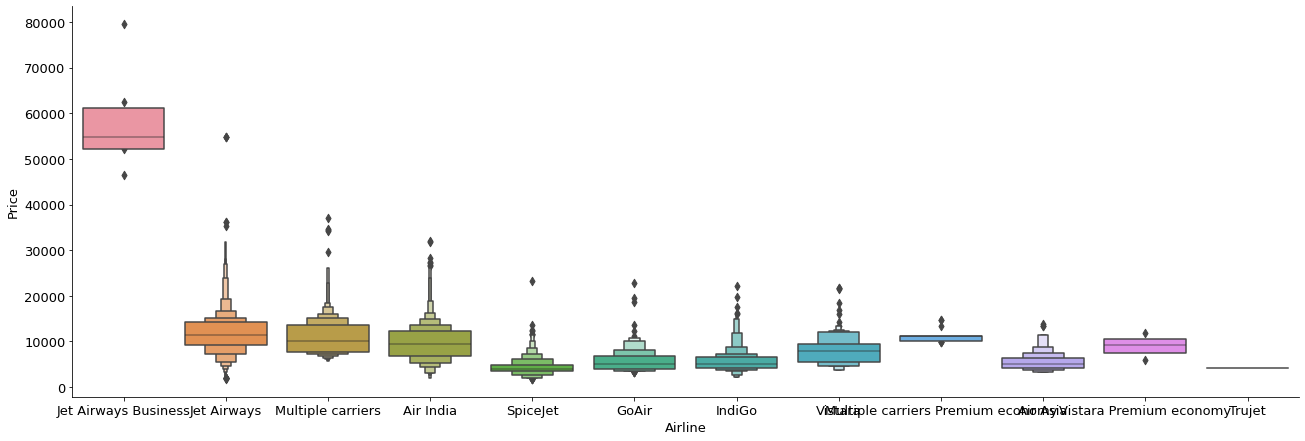

In [31]:
sns.catplot(y = "Price",
            x = "Airline", 
            data = train.sort_values("Price", ascending = False), 
            kind="boxen",
            height = 6, 
            aspect = 3);

In [32]:
Airlines = train[["Airline"]]
Airlines = pd.get_dummies(Airlines, drop_first=True)
Airlines.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [33]:
Source = train[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
Destination = train[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [35]:
train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
train.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True) 

In [37]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Journey_year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [38]:
train.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [39]:
train.head()

,Total_Stops,Price,Journey_date,Journey_month,Journey_year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,0,3897,24,3,2019,22,20,1,10,2,50
1,2,7662,1,5,2019,5,50,13,15,7,25
2,2,13882,9,6,2019,9,25,4,25,19,0
3,1,6218,12,5,2019,18,5,23,30,5,25
4,1,13302,1,3,2019,16,50,21,35,4,45


In [40]:
train_data = pd.concat([train,Airlines, Source, Destination], axis=1)

In [41]:
train_data.head()

,Total_Stops,Price,Journey_date,Journey_month,Journey_year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minute,duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [42]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month', 'Journey_year',
       'Dep_hour', 'Dep_minutes', 'Arrival_hour', 'Arrival_minute',
       'duration_hours', 'duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [43]:
train_data.shape

(10682, 31)

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Journey_date                               10682 non-null  int64
 3   Journey_month                              10682 non-null  int64
 4   Journey_year                               10682 non-null  int64
 5   Dep_hour                                   10682 non-null  int64
 6   Dep_minutes                                10682 non-null  int64
 7   Arrival_hour                               10682 non-null  int64
 8   Arrival_minute                             10682 non-null  int64
 9   duration_hours                             10682 non-null  int64
 10  duration_mins                              106

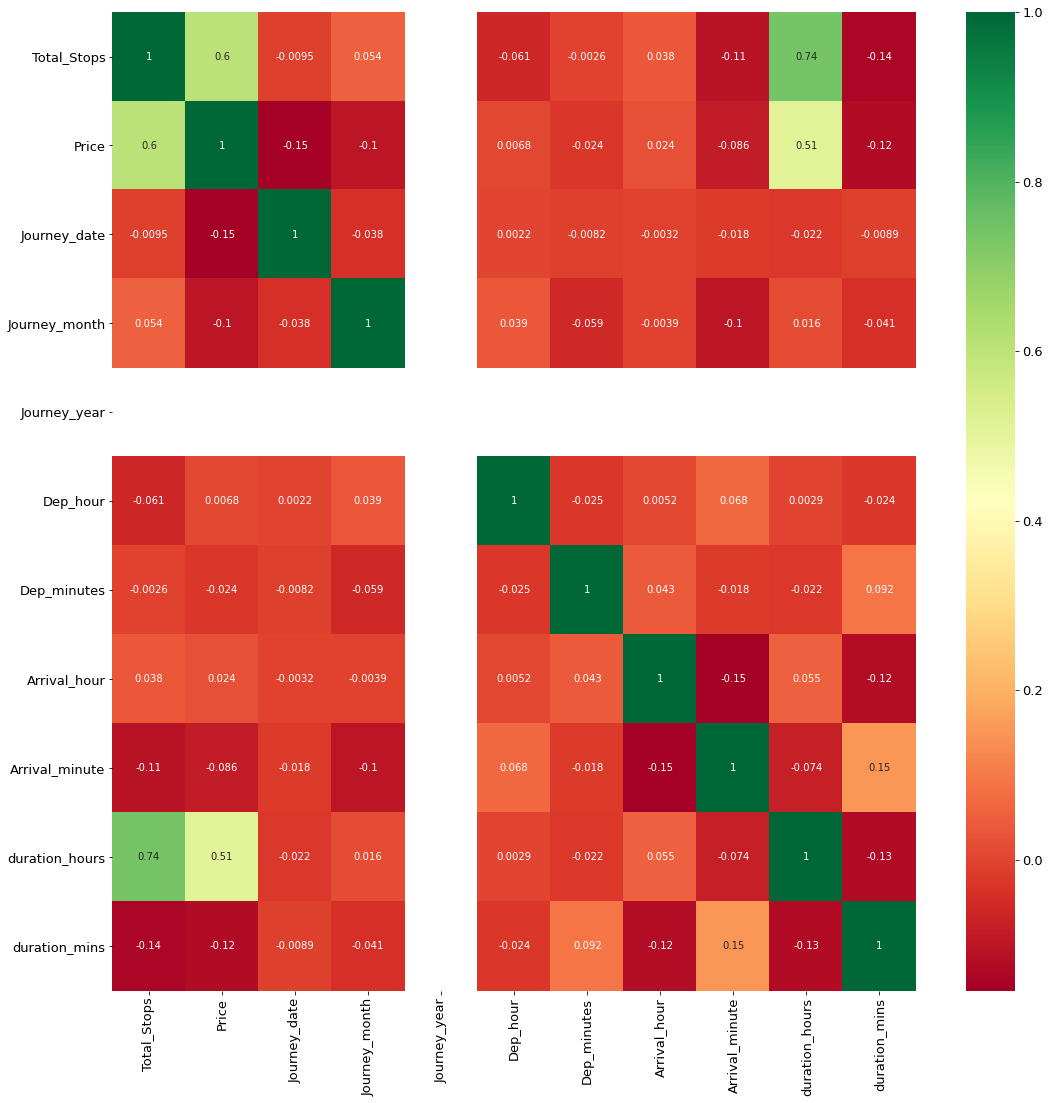

In [45]:
# Correlationm 
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(),annot=True, cmap="RdYlGn");

In [46]:
train_data.head()

,Total_Stops,Price,Journey_date,Journey_month,Journey_year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minute,duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [47]:
x = train_data.drop(["Price"], axis=1)
y = train["Price"]

In [48]:
feature = ExtraTreesRegressor()
feature.fit(x,y)

ExtraTreesRegressor()

In [49]:
print(feature.feature_importances_)

[2.38709337e-01 1.45177859e-01 5.25446038e-02 0.00000000e+00
 2.41118856e-02 2.12446684e-02 2.75649911e-02 1.91364567e-02
 1.08168556e-01 1.75734480e-02 1.05215222e-02 1.69194997e-03
 1.80405753e-02 1.41263472e-01 6.69448279e-02 1.86246356e-02
 8.72209196e-04 3.35948701e-03 8.33398060e-05 5.18617286e-03
 9.25987610e-05 4.40169189e-04 1.09568574e-02 3.36748317e-03
 7.12963193e-03 9.78304389e-03 1.54286566e-02 6.52276039e-03
 5.24203597e-04 2.49345983e-02]


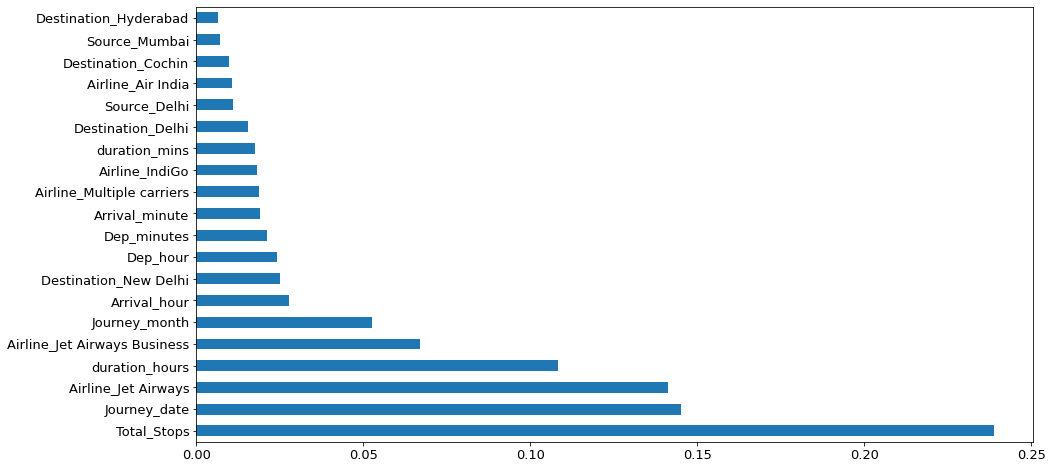

In [50]:
feature_importance = pd.Series(feature.feature_importances_, index= x.columns)
feature_importance.nlargest(20).plot(kind="barh");

## Total Stops plays the most important role to decide the fare of the airlines

In [51]:
train_data.head()

,Total_Stops,Price,Journey_date,Journey_month,Journey_year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minute,duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [52]:
x.head()

,Total_Stops,Journey_date,Journey_month,Journey_year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [53]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [55]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [56]:
rf.score(x_train, y_train)

0.9534008447943758

In [57]:
rf.score(x_test, y_test)

0.797603539069845

In [58]:
y_preds = rf.predict(x_test)

In [59]:
y_preds

array([16791.63      ,  5797.14      ,  8910.48      , ...,
        6613.13      , 12712.97166667, 12812.44809524])

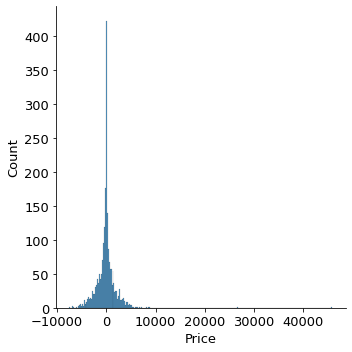

In [60]:
sns.displot(y_test-y_preds);

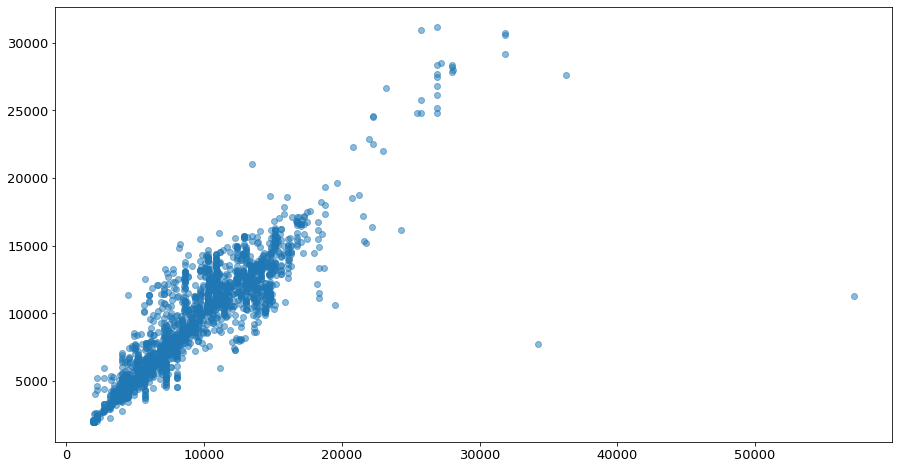

In [61]:
plt.scatter(y_test, y_preds, alpha=0.5);

In [62]:
print('MAE:', mean_absolute_error(y_test, y_preds))
print('MSE:', mean_squared_error(y_test, y_preds))
print('MSLE:', mean_squared_log_error(y_test, y_preds))

MAE: 1178.6415579988825
MSE: 4364083.890387011
MSLE: 0.03460075819599834


In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)

0.797603539069845

Hyperparamter Tuning 

In [64]:
# Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
max_features = ['auto', 'sqrt']
min_samples_slit = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [65]:
rf_grid ={"n_estimators" : n_estimators,
         "max_features": max_features,
         "max_depth":max_depth,
         "min_samples_split": min_samples_slit,
         "min_samples_leaf": min_samples_leaf}

In [66]:
rf_random = RandomizedSearchCV(estimator=rf, 
                              param_distributions = rf_grid,
                              scoring = 'neg_mean_squared_error',
                              cv =5,
                              n_iter = 10,
                              verbose= 2,
                              random_state=42,
                              n_jobs = 1)

In [67]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [68]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [69]:
rf_random.best_score_

-3816713.947434717

In [70]:
prediction = rf_random.predict(x_test)

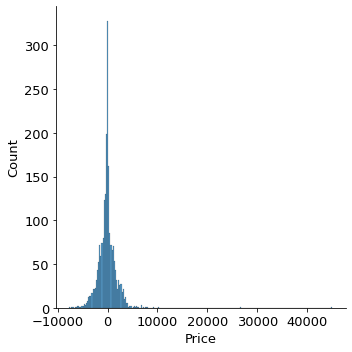

In [71]:
sns.displot(y_test-prediction);

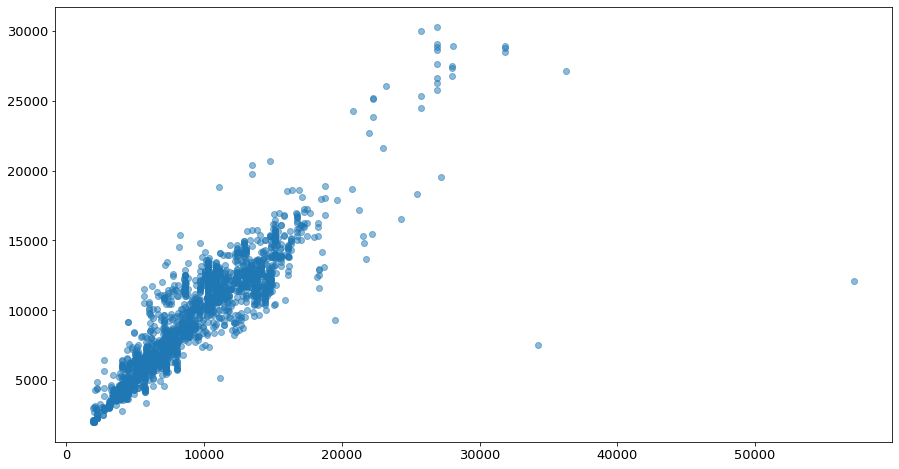

In [72]:
plt.scatter(y_test, prediction, alpha=0.5);

In [73]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('MSLE:', mean_squared_log_error(y_test, prediction))

MAE: 1164.0402807472894
MSE: 4043001.2150088237
MSLE: 0.031600534998624856


In [74]:
r2_score(y_test, prediction)

0.8124946362152686

## Test Data

In [75]:
test = pd.read_excel(r'data/Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [78]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [80]:
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [81]:
test["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

## Preprocessing

In [84]:
test["journey_day"] = pd.to_datetime(test["Date_of_Journey"], format="%d/%m/%Y").dt.day
test["journey_month"] = pd.to_datetime(test["Date_of_Journey"], format="%d/%m/%Y").dt.month
test["journey_year"] = pd.to_datetime(test["Date_of_Journey"], format="%d/%m/%Y").dt.year
test["dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["dep_minute"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test["arrival_hour"] = pd.to_datetime(test["Arrival_Time"]).dt.hour
test["arrival_minute"] = pd.to_datetime(test["Arrival_Time"]).dt.minute
test.drop(["Date_of_Journey","Dep_Time","Arrival_Time"], axis=1, inplace=True)

In [85]:
test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,journey_year,dep_hour,dep_minute,arrival_hour,arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,23,55,2,45


In [87]:
# Categorical Features
Airline = pd.get_dummies(test["Airline"], drop_first=True)
Source = pd.get_dummies(test["Source"], drop_first=True)
Destination = pd.get_dummies(test["Destination"], drop_first=True)

In [88]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [89]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [90]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [91]:
test_data = pd.concat([test, Airline,Destination, Source], axis=1)

In [92]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,journey_year,...,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,...,0,1,0,0,0,0,0,1,0,0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,...,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,...,0,1,0,0,0,0,0,1,0,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,...,0,1,0,0,0,0,0,1,0,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,...,0,0,1,0,0,0,0,0,0,0


In [93]:
test_data.drop(["Airline", "Destination", "Source"], axis=1, inplace=True)

In [94]:
test_data.head()

,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,journey_year,dep_hour,dep_minute,arrival_hour,...,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,...,0,1,0,0,0,0,0,1,0,0
1,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,6,20,10,...,0,0,0,0,0,0,0,0,1,0
2,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,...,0,1,0,0,0,0,0,1,0,0
3,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,8,0,21,...,0,1,0,0,0,0,0,1,0,0
4,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,23,55,2,...,0,0,1,0,0,0,0,0,0,0


In [96]:
#Total_stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Duration 
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [97]:
test_data.head()

,Route,Total_Stops,Additional_Info,journey_day,journey_month,journey_year,dep_hour,dep_minute,arrival_hour,arrival_minute,...,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Duration_hours,Duration_mins
0,DEL → BOM → COK,1,No info,6,6,2019,17,30,4,25,...,0,0,0,0,0,1,0,0,10,55
1,CCU → MAA → BLR,1,No info,12,5,2019,6,20,10,20,...,0,0,0,0,0,0,1,0,4,0
2,DEL → BOM → COK,1,In-flight meal not included,21,5,2019,19,15,19,0,...,0,0,0,0,0,1,0,0,23,45
3,DEL → BOM → COK,1,No info,21,5,2019,8,0,21,0,...,0,0,0,0,0,1,0,0,13,0
4,BLR → DEL,0,No info,24,6,2019,23,55,2,45,...,1,0,0,0,0,0,0,0,2,50


In [98]:
test_data.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [99]:
test_data.head(5)

,Total_Stops,journey_day,journey_month,journey_year,dep_hour,dep_minute,arrival_hour,arrival_minute,Air India,GoAir,...,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Duration_hours,Duration_mins
0,1,6,6,2019,17,30,4,25,0,0,...,0,0,0,0,0,1,0,0,10,55
1,1,12,5,2019,6,20,10,20,0,0,...,0,0,0,0,0,0,1,0,4,0
2,1,21,5,2019,19,15,19,0,0,0,...,0,0,0,0,0,1,0,0,23,45
3,1,21,5,2019,8,0,21,0,0,0,...,0,0,0,0,0,1,0,0,13,0
4,0,24,6,2019,23,55,2,45,0,0,...,1,0,0,0,0,0,0,0,2,50


In [100]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        2671 non-null   int64
 1   journey_day                        2671 non-null   int64
 2   journey_month                      2671 non-null   int64
 3   journey_year                       2671 non-null   int64
 4   dep_hour                           2671 non-null   int64
 5   dep_minute                         2671 non-null   int64
 6   arrival_hour                       2671 non-null   int64
 7   arrival_minute                     2671 non-null   int64
 8   Air India                          2671 non-null   uint8
 9   GoAir                              2671 non-null   uint8
 10  IndiGo                             2671 non-null   uint8
 11  Jet Airways                        2671 non-null   uint8
 12  Jet Airways Business

In [102]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [103]:
new_rf = RandomForestRegressor(n_estimators =700, min_samples_split=15, min_samples_leaf=1,max_features="auto", max_depth=20)
new_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [104]:
new_rf.score(x_train, y_train)

0.8960815156598447

In [105]:
new_rf.score(x_test, y_test)

0.8122295203941806

In [107]:
r2_score(y_test, prediction) 

0.8124946362152686